<a href="https://colab.research.google.com/github/alexmartin299/GAN-PhaseRetrieval/blob/main/GANRetrievalfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Mounted at /content/drive


Se han truncado las últimas 5000 líneas del flujo de salida.
Generator loss: 0.9669448137283325 Discriminator Loss: 0.7246198654174805
Batch number 4 from 227.0
Generator loss: 1.7573672533035278 Discriminator Loss: 1.158698558807373
Batch number 5 from 227.0
Generator loss: 1.0484743118286133 Discriminator Loss: 1.20777428150177
Batch number 6 from 227.0
Generator loss: 1.7844343185424805 Discriminator Loss: 1.1994519233703613
Batch number 7 from 227.0
Generator loss: 1.0728063583374023 Discriminator Loss: 0.7473670244216919
Batch number 8 from 227.0
Generator loss: 1.9212579727172852 Discriminator Loss: 0.9028624296188354
Batch number 9 from 227.0
Generator loss: 1.1269373893737793 Discriminator Loss: 0.6698436737060547
Batch number 10 from 227.0
Generator loss: 1.1771526336669922 Discriminator Loss: 1.0097124576568604
Batch number 11 from 227.0
Generator loss: 1.188881278038025 Discriminator Loss: 0.9452838897705078
Batch number 12 from 227.0
Generator loss: 2.0833778381347656 Discr

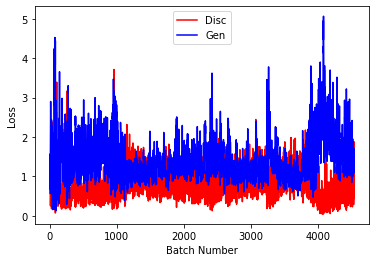

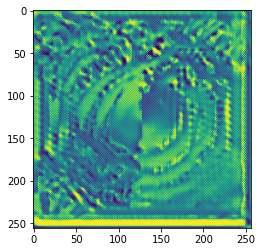

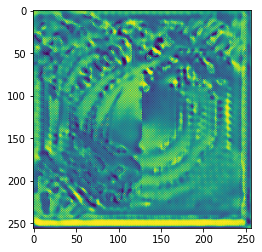

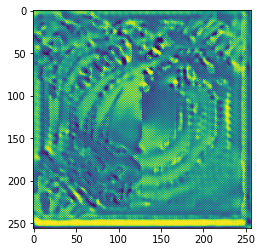

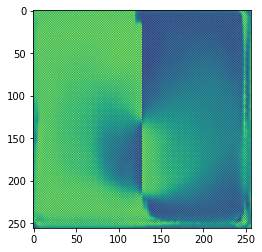

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import time
import os

physical_devices = tf.config.list_physical_devices('GPU')

tf.config.experimental.set_memory_growth(physical_devices[0], True)



def files_to_images(folder_dir):
    """extrau las imatges rgb d'una carpeta y les retorna en unic array
    a mes de retornar cuantes imatges hi ha a la carpeta"""
    noms = os.listdir(folder_dir)
    intensity_images = np.empty((908, 256, 256, 1),dtype='float32')
    phase_images = np.empty((908, 256, 256, 1),dtype='float32')
    i=0
    imatges = []
    for nom in noms:
            imatges.append(nom)
    for nom in imatges:
        image = np.load(os.path.join(folder_dir,nom))
        intensity = image["intensity"]
        phase = image["phase"]
        intensity_images[i,:,:,:] = np.resize(intensity,(256,256,1))
        phase_images[i,:, :, :] = np.resize(phase, (256, 256, 1))
        i += 1
    return (intensity_images-(255/2))/(255/2) , phase_images/np.pi

intensity_images, phase_images =files_to_images("/content/drive/MyDrive/Practicas/final_dataset.zip (Unzipped Files)/final_dataset")
BATCH_SIZE =4 
BUFFER_SIZE=1000
intensity_data = tf.data.Dataset.from_tensor_slices(intensity_images).batch(BATCH_SIZE).shuffle(BUFFER_SIZE)
phase_data = tf.data.Dataset.from_tensor_slices(phase_images).batch(BATCH_SIZE).shuffle(BUFFER_SIZE)

def make_generator_model():
  
    alpha_value = 0.2
    img_inputs = keras.Input(shape=(256, 256,1))
    # encoder
    x = layers.Conv2D(16, kernel_size=(9,9) ,padding='same')(img_inputs)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(16, kernel_size=(6,6) , padding='same',)(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, kernel_size=(3,3) , padding='same')(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    
    block_1_output = layers.BatchNormalization()(x)

    x = layers.Conv2D(32, kernel_size=(6,6) , strides=(2,2))(block_1_output)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, kernel_size=(3,3) , padding="same")(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, kernel_size=(6,6) , padding="same")(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    block_2_output = layers.BatchNormalization()(x)

    # latent space
    x = layers.Conv2D(64, kernel_size=(6,6) , strides=(2,2))(block_2_output)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, kernel_size=(3,3) , padding='same')(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, kernel_size=(6,6) ,padding='same')(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    block_3_output = layers.BatchNormalization()(x)

    x = layers.Conv2D(256, kernel_size=(6,6) , strides=(2,2))(block_3_output)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.Conv2D(256, kernel_size=(3,3) , padding='same')(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.Conv2D(256, kernel_size=(3,3) , padding='same')(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.Conv2DTranspose(256, kernel_size=(7,7) , strides=(2,2))(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)






    x = layers.concatenate([x, block_3_output])
    x = layers.Conv2D(256, kernel_size=(6,6) , padding='same')(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, kernel_size=(3,3) , padding='same')(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2DTranspose(64,kernel_size=(6,6),strides=(2,2))(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)

    # decoder

    x = layers.concatenate([x, block_2_output])
    x = layers.Conv2D(64, kernel_size=(6,6) ,padding="same",)(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, kernel_size=(3,3) ,padding="same",)(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2DTranspose(32, kernel_size=(6,6) , strides=(2,2))(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)


    x = layers.concatenate([x, block_1_output])
    x = layers.Conv2D(32, kernel_size=(3,3) , padding='same')(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(16, kernel_size=(6,6) , padding="same")(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(16, kernel_size=(9,9) , padding="same")(x)
    x = layers.LeakyReLU(alpha=alpha_value)(x)
    x = layers.BatchNormalization()(x)
    output = layers.Conv2D(1,1, padding='same',activation='tanh')(x)


    model = keras.Model(img_inputs, output)

    return model


generator = make_generator_model()


def make_discriminator_model():
    model = tf.keras.Sequential()

    model.add(layers.Conv2D(6, kernel_size=(9, 9),activation='tanh',
                     input_shape=(256, 256,1)))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((2, 2), strides=None, ))

    model.add(layers.Conv2D(16, kernel_size=(5, 5),activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((3, 3), strides=None, ))

    model.add(layers.Conv2D(32, kernel_size=(3, 3),activation='tanh'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((3, 3), strides=None, ))

    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation='tanh'))
    model.add(layers.Dense(1,activation ='sigmoid'))
#resultado binario [0,1]

    return model

discriminator = make_discriminator_model()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


noise_dim = 100
num_examples_to_generate = 16

# seed para que la inicializacion del generador sea siempre la misma
seed = tf.random.normal([num_examples_to_generate, noise_dim])

def train_step(intensity,phase):

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(intensity, training=True)

      real_output = discriminator(phase, training=False)
      fake_output = discriminator(generated_images, training=False)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss.numpy(), disc_loss.numpy()


def train(intensity_data,phase_data, epochs):
  gen_list = []
  disc_list = []
  x_list=[]
  j=0
  for epoch in range(epochs):
    start = time.time()
    i=0

    for intensity_batch,phase_batch in zip(intensity_data,phase_data):
        i += 1
        intensity_batch=tf.reshape(intensity_batch,(4,256,256,1))
        phase_batch=tf.reshape(phase_batch, (4, 256, 256, 1))
        gen_loss , disc_loss = train_step(intensity_batch,phase_batch)
        print('Batch number {} from {}'.format(i, intensity_images.shape[0]/4))
        print('Generator loss: {} Discriminator Loss: {}'.format(gen_loss, disc_loss))
        gen_list.append(gen_loss)
        disc_list.append(disc_loss)
        x_list.append(i+j*227)
    j+=1

    print('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))
  plt.figure()
  plt.plot(x_list,disc_list,'r')
  plt.plot(x_list,gen_list,'b')
  plt.xlabel('Batch Number')
  plt.ylabel('Loss')
  plt.legend(['Disc','Gen'])
  plt.show()

train(intensity_data,phase_data,20)


predictions = generator.predict(intensity_images[:,:,:,:])[0,:,:,0]
predictions1 = generator.predict(intensity_images[:,:,:,:])[10,:,:,0]
predictions2 = generator.predict(intensity_images[:,:,:,:])[100,:,:,0]
predictions3 = generator.predict(intensity_images[:,:,:,:])[900,:,:,0]
plt.figure()
plt.imshow(predictions)
plt.show()
plt.figure()
plt.imshow(predictions1)
plt.show()
plt.figure()
plt.imshow(predictions2)
plt.show()
plt.figure()
plt.imshow(predictions3)
plt.show()


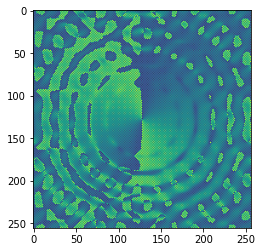

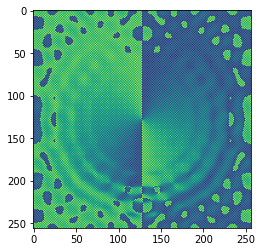

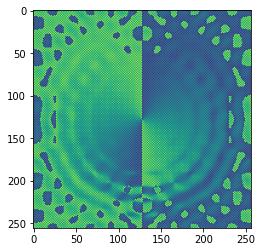

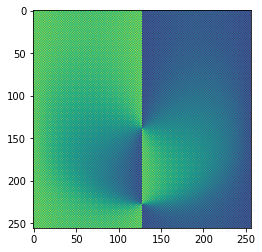

In [ ]:

plt.figure()
plt.imshow(phase_images[0,:,:,0])
plt.show()
plt.figure()
plt.imshow(phase_images[10,:,:,0])
plt.show()
plt.figure()
plt.imshow(phase_images[100,:,:,0])
plt.show()
plt.figure()
plt.imshow(phase_images[900,:,:,0])
plt.show()